<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/search_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
# Total ../data/0&1/
url = 'https://raw.githubusercontent.com/tomstark99/COMS30050/main/coursework/data/0%261/sum_targets_with_panic.csv'
total_dep_score = pd.read_csv(url)

In [3]:
X_t = total_dep_score.copy()
del X_t['dep_score']
del X_t['dep_thoughts']
del X_t['has_dep_diag']
del X_t['prim_diag']
del X_t['secd_diag']
del X_t['panic_score']
del X_t['total']


y_t = total_dep_score['total']
y_t.value_counts() 

1.0    523
2.0    287
5.0    189
3.0    149
4.0     68
6.0     38
Name: total, dtype: int64

In [4]:
523 / (523 + 287 + 189 + 149 + 68 + 38)

0.41706539074960125

In [5]:
print(X_t)
print(y_t)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             1          2          1          1        1        2
1             2          2          3          3        1        2
2             1          0          1          2        1        1
3             2          3          3          3        2        3
4             2          3          1          1        2        1
...         ...        ...        ...        ...      ...      ...
1249          2          2          2          2        2        1
1250          3          3          1          1        1        2
1251          3          0          2          2        2        2
1252          2          3          1          1        1        2
1253          2          3          1          1        1        2

[1254 rows x 6 columns]
0       1.0
1       3.0
2       5.0
3       4.0
4       2.0
       ... 
1249    1.0
1250    1.0
1251    1.0
1252    1.0
1253    5.0
Name: total, Length: 1254, dtype: float

In [6]:
# Sampled

In [7]:
url = 'https://raw.githubusercontent.com/tomstark99/COMS30050/main/coursework/data/0%261/sampled_sum_targets_with_panic.csv'
sampled_dep_score = pd.read_csv(url)

X_s = sampled_dep_score.copy()
del X_s['dep_score']
del X_s['dep_thoughts']
del X_s['has_dep_diag']
del X_s['prim_diag']
del X_s['secd_diag']
del X_s['panic_score']
del X_s['total']

y_s = sampled_dep_score['total']
y_s.value_counts() 

4.0    38
5.0    38
1.0    38
6.0    38
2.0    38
3.0    38
Name: total, dtype: int64

In [8]:
38 / (38*6)

0.16666666666666666

In [9]:
print(X_s)
print(y_s)

     comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0            3          3          2          3        1        2
1            2          3          2          2        3        2
2            2          2          0          0        3        3
3            3          3          3          3        3        3
4            3          3          0          0        3        3
..         ...        ...        ...        ...      ...      ...
223          1          1          1          2        2        2
224          3          2          3          3        2        3
225          2          3          1          1        2        2
226          2          3          3          3        2        3
227          1          3          1          1        2        2

[228 rows x 6 columns]
0      3.0
1      3.0
2      2.0
3      6.0
4      2.0
      ... 
223    2.0
224    1.0
225    5.0
226    6.0
227    4.0
Name: total, Length: 228, dtype: float64


## SVM

## Seed == 100

In [10]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [11]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


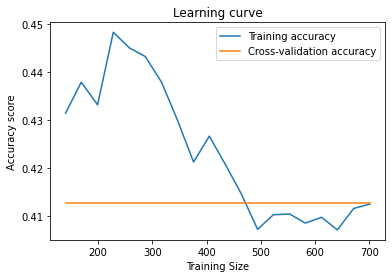

In [12]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 1234

In [13]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [14]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


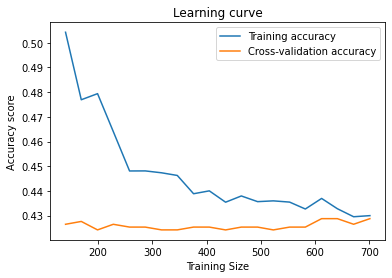

In [15]:
plot_model = svm.SVC(kernel='poly', C=1.0, gamma=0.1)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 500

In [16]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [17]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


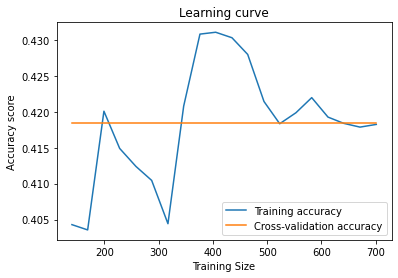

In [18]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [19]:
# learning curve considering different seeds 

In [20]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

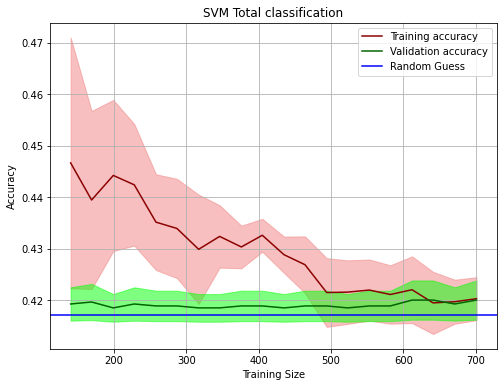

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Total classification')
ax.axhline(y=0.4170, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

## Logistic Regression

## Seed 100

In [22]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [23]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


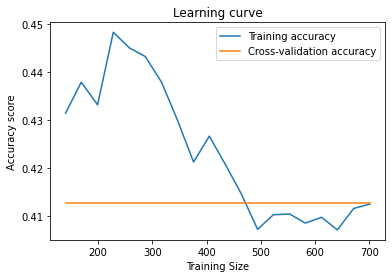

In [24]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [25]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [26]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


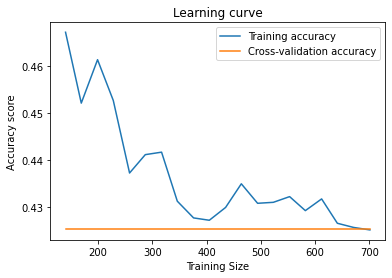

In [27]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [28]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [29]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


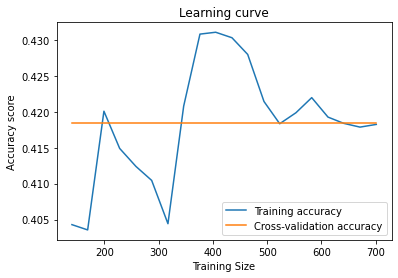

In [30]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [31]:
# learning curve considering different seeds 

In [32]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

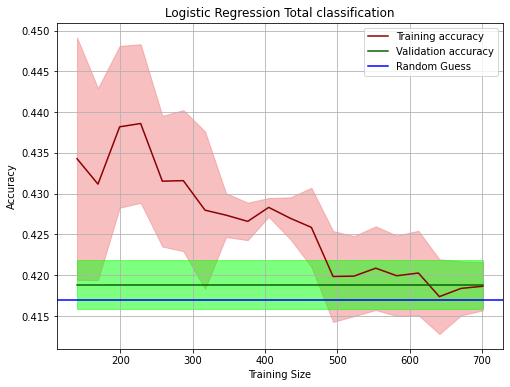

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Total classification')
ax.axhline(y=0.4170, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

## KNN

## Seed 100

In [34]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [35]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


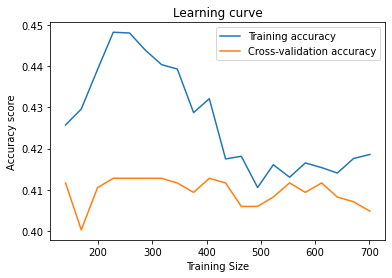

In [36]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='uniform', n_neighbors=34)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [37]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [38]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


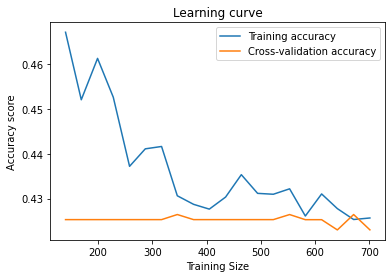

In [39]:
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=50)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [40]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [41]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


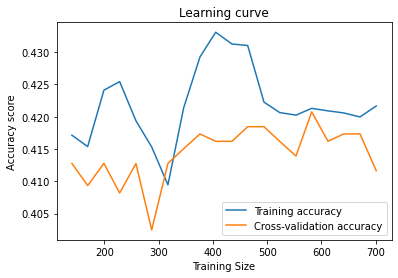

In [42]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=23, weights='uniform', n_neighbors=50)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [43]:
# learning curve considering different seeds 

In [44]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

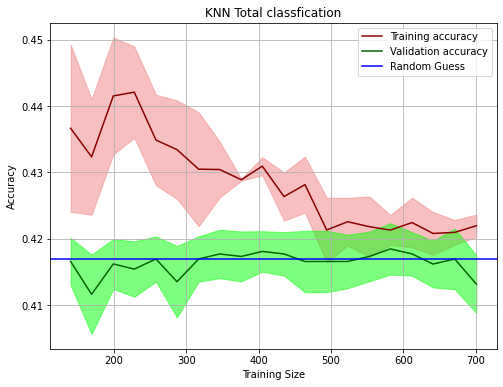

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Total classfication')
ax.axhline(y=0.4170, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

## Random Forest

## Seed 100

In [46]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [47]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


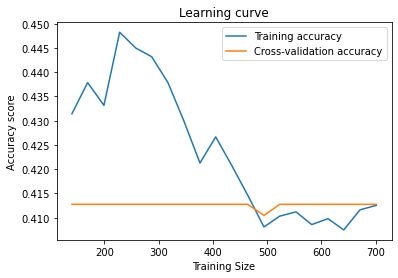

In [48]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='log2', min_samples_leaf=50, min_samples_split=14, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [49]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [50]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


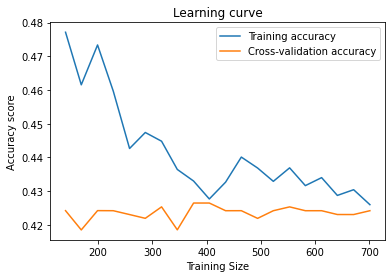

In [51]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='sqrt', min_samples_leaf=2, min_samples_split=14, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [52]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [53]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


[learning_curve] Training set sizes: [140 169 199 228 258 287 317 346 376 405 435 464 494 523 553 582 612 641
 671 701]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


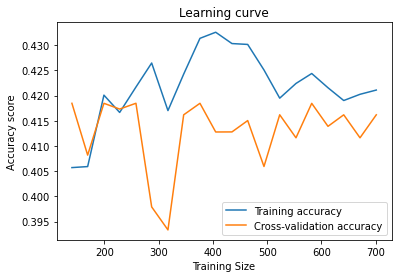

In [54]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=26, max_features='auto', min_samples_leaf=26, min_samples_split=50, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [55]:
# learning curve considering different seeds 

In [56]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

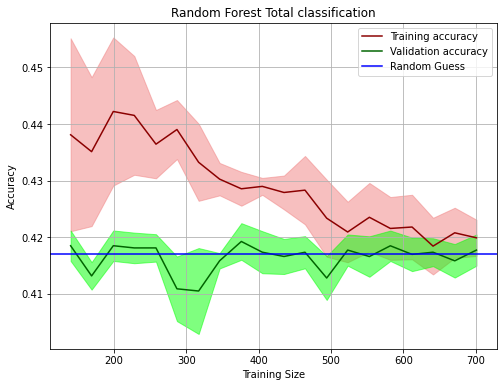

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Total classification')
ax.axhline(y=0.4170, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

# 2. sampled

# SVM 

## Seed 100

In [58]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [59]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


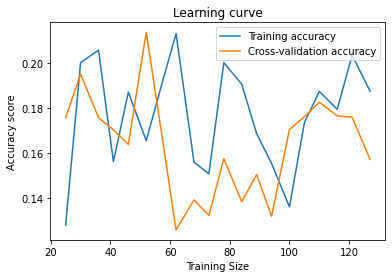

In [60]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.1)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [61]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [62]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


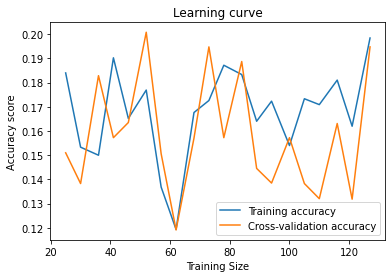

In [63]:
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.1)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [64]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [65]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


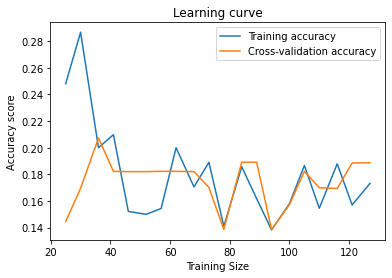

In [66]:
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [67]:
# learning curve considering different seeds 

In [68]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

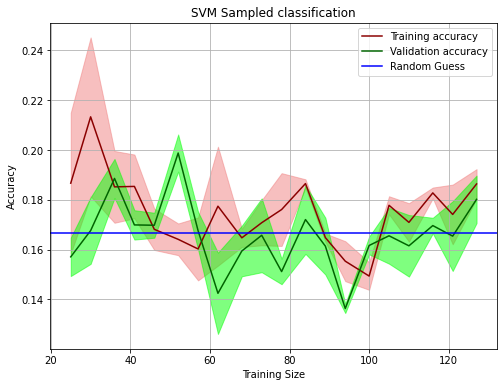

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Sampled classification')
ax.axhline(y=0.1666, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

# Logistic Regression

## Seed 100

In [70]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [71]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


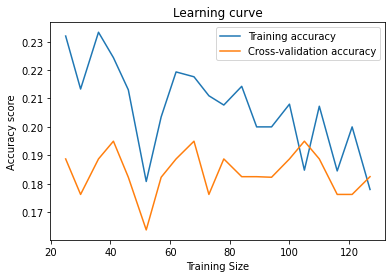

In [72]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', solver='saga')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [73]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [74]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


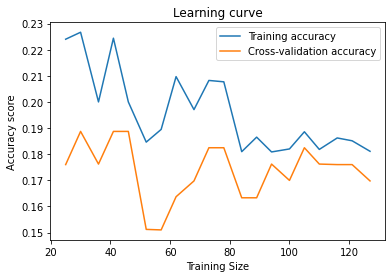

In [75]:
plot_model = LogisticRegression(C=0.001, multi_class='auto', penalty='l1', solver='saga')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [76]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [77]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


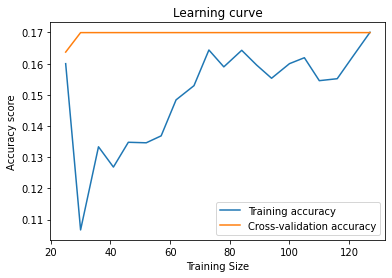

In [78]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [79]:
# learning curve considering different seeds 

In [80]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

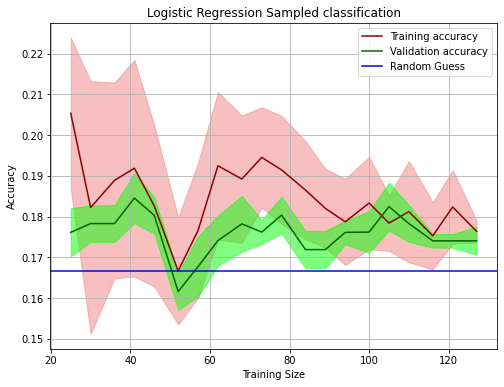

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Sampled classification')
ax.axhline(y=0.1666, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

# KNN

## Seed 100

In [82]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [83]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


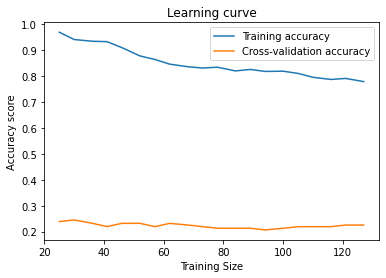

In [84]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=67, weights='distance', n_neighbors=2)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [85]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [86]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


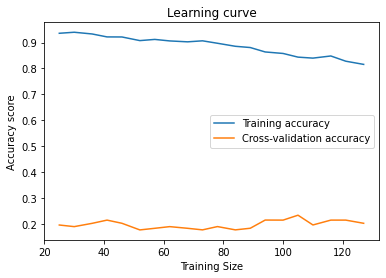

In [87]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=23, weights='distance', n_neighbors=2)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [88]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [89]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


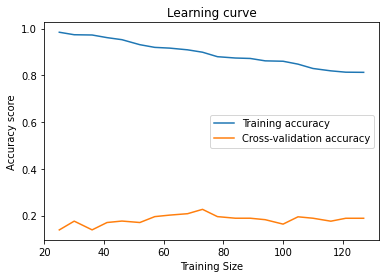

In [90]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=34, weights='distance', n_neighbors=7)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [91]:
# learning curve considering different seeds

In [92]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

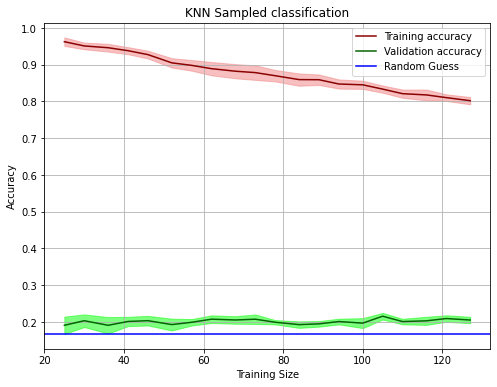

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Sampled classification')
ax.axhline(y=0.1666, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

# Random Forest

## Seed 100

In [94]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [95]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


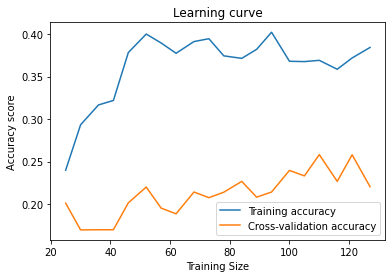

In [96]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=26, max_features='sqrt', min_samples_leaf=14, min_samples_split=2, n_estimators=27)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [97]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [98]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


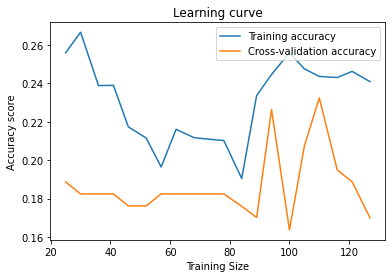

In [99]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='log2', min_samples_leaf=26, min_samples_split=2, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [100]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [101]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


[learning_curve] Training set sizes: [ 25  30  36  41  46  52  57  62  68  73  78  84  89  94 100 105 110 116
 121 127]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


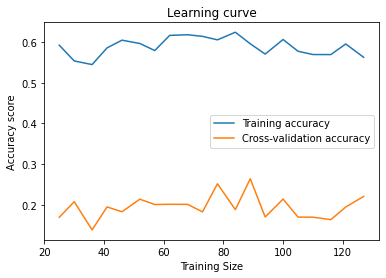

In [102]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=50, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [103]:
# learning curve considering different seeds

In [104]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

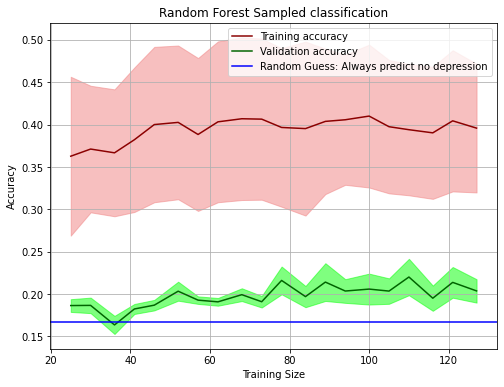

In [105]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Sampled classification')
ax.axhline(y=0.1666, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()